In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.shape

(891, 12)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

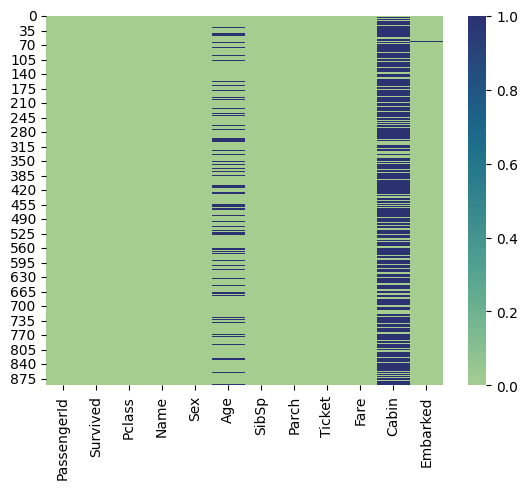

In [11]:
sns.heatmap(df.isnull(), cmap="crest")

<Axes: >

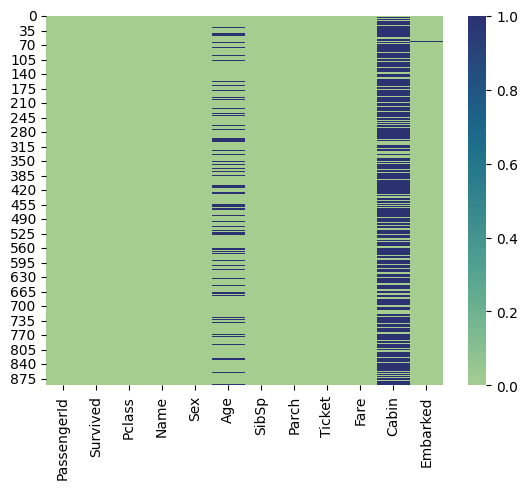

In [11]:
sns.heatmap(df.isnull(), cmap="crest")

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
print((177/890)*100,"% values are null for age" )

19.8876404494382 % values are null for age


<Axes: xlabel='Survived', ylabel='count'>

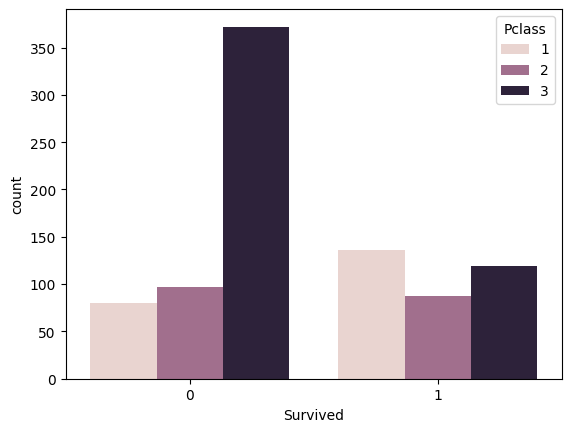

In [23]:
sns.countplot(x="Survived", hue="Pclass", data=df)

<Axes: xlabel='Survived', ylabel='count'>

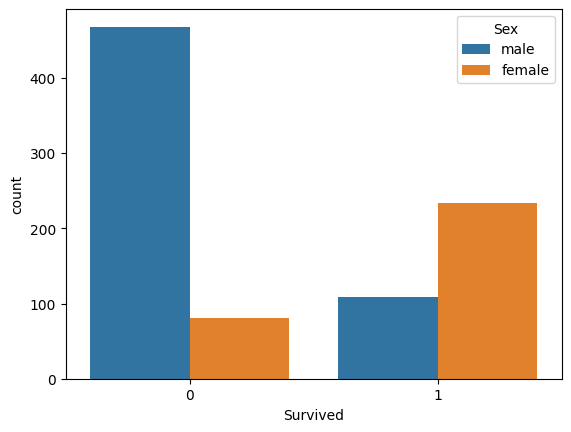

In [25]:
sns.countplot(x="Survived", hue="Sex", data=df)

In [26]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df = df.drop(columns=["Cabin"])

<Axes: xlabel='Survived', ylabel='count'>

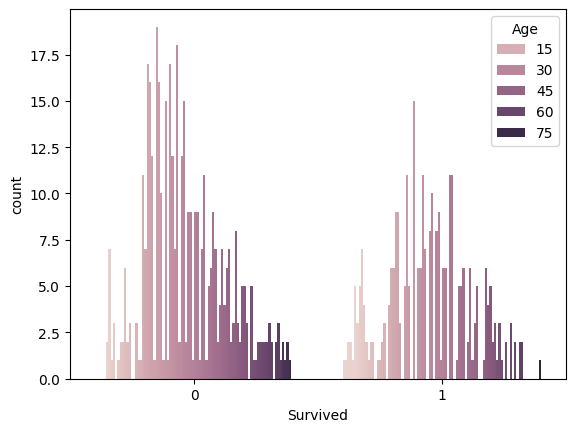

In [41]:
sns.countplot(x="Survived", hue="Age", data=df)

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [49]:
from sklearn.linear_model import LinearRegression


age_train = df[df["Age"].notnull()]
age_test = df[df["Age"].isnull()]

features = ['Pclass', 'Sex']
x_train = pd.get_dummies(age_train[features])
y_train = age_train["Age"]

model = LinearRegression()
model.fit(x_train, y_train)

x_test = pd.get_dummies(age_test[features])
age_test = model.predict(x_test)

df.loc[df['Age'].isnull(), 'Age'] = age_test

<Axes: >

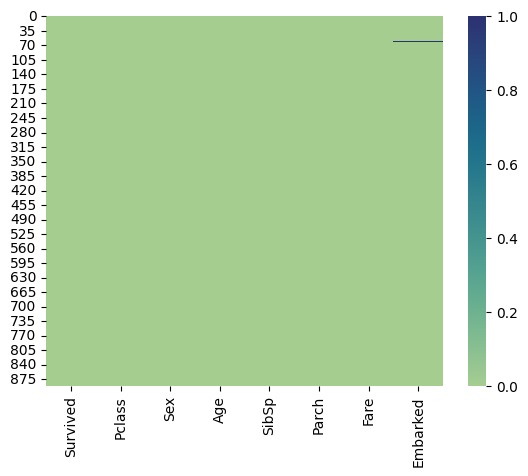

In [50]:
sns.heatmap(df.isnull(), cmap="crest")

In [52]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [54]:

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [55]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: >

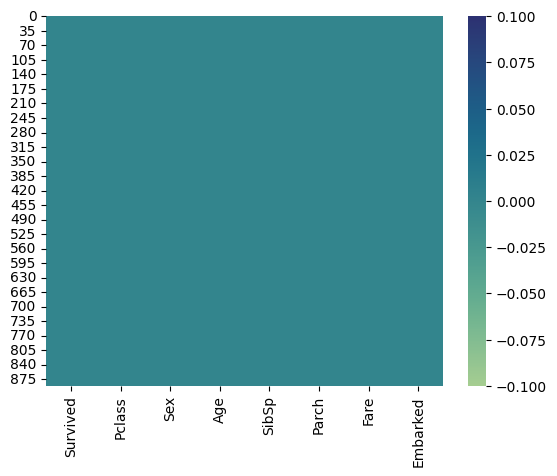

In [56]:
sns.heatmap(df.isnull(), cmap="crest")

In [57]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Survived', ylabel='count'>

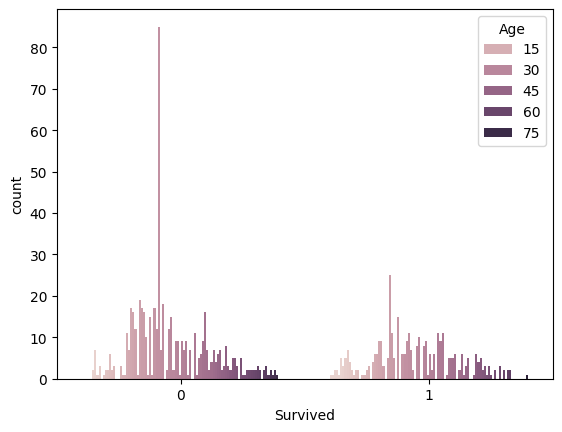

In [58]:
sns.countplot(x="Survived", hue="Age", data=df)

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [62]:
df["Sex"] = le.fit_transform(df["Sex"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Bin
0,0,3,1,22.0,1,0,7.2500,S,20-30
1,1,1,0,38.0,1,0,71.2833,C,30-40
2,1,3,0,26.0,0,0,7.9250,S,20-30
3,1,1,0,35.0,1,0,53.1000,S,30-40
4,0,3,1,35.0,0,0,8.0500,S,30-40


In [82]:
cols = ['Embarked_Q', 'Embarked_S']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_Bin,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,20-30,0,1
1,1,1,0,38.0,1,0,71.2833,30-40,0,0
2,1,3,0,26.0,0,0,7.9250,20-30,0,1
3,1,1,0,35.0,1,0,53.1000,30-40,0,1
4,0,3,1,35.0,0,0,8.0500,30-40,0,1


In [87]:
df=df.drop("Age_Bin", axis=1)

In [108]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [120]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop("Survived", axis=1), df["Survived"], test_size=0.25)

logmodel = LogisticRegression()


#X_train,X_test,Y_train,Y_test = train_test_split(df.drop("Survived", axis=1), df["Survived"], test_size=0.30)
logmodel.fit(X_train, Y_train)


C:\Users\vishn\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:
X_train_prediction = logmodel.predict(X_train)

training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy_score_of_training_data : ', training_data_accuracy)

Accuracy_score_of_training_data :  0.7859281437125748


In [125]:
X_test_prediction = logmodel.predict(X_test)

test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy_score_of_test data : ', test_data_accuracy)

Accuracy_score_of_test data :  0.8609865470852018
